# Goal and data import

In [23]:
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#set directory
os.chdir('C:\\Users\\Inna\\Desktop\\pydata')

#read xlsx
df = pd.read_excel('Data_RB_Case_Study.xlsx', sheetname='Train')
print (df.isnull().sum()) #no missing values
print(df.describe()) #no outliers


Gender    0
x1        0
x2        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
x10       0
x11       0
x12       0
x13       0
x14       0
x15       0
x16       0
x17       0
x18       0
x19       0
x20       0
x21       0
x22       0
x23       0
x24       0
x25       0
x26       0
x27       0
x28       0
x29       0
x30       0
x31       0
x32       0
x33       0
x34       0
x35       0
x36       0
x37       0
x38       0
x39       0
x40       0
x41       0
x42       0
x43       0
x44       0
x45       0
dtype: int64
            Gender           x1           x2           x3           x4  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.465500     5.034083     5.018200     4.911232     4.912412   
std       0.498933     2.909781     2.889966     2.871402     2.925843   
min       0.000000     0.001557     0.006796     0.004259     0.006314   
25%       0.000000     2.460645     2.535577     2.503660     2.3

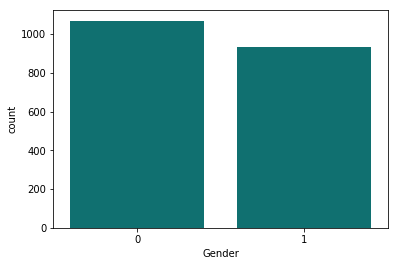

In [24]:
#gender distribution
sns.countplot(x='Gender', data=df, color="teal")

# Variable selection

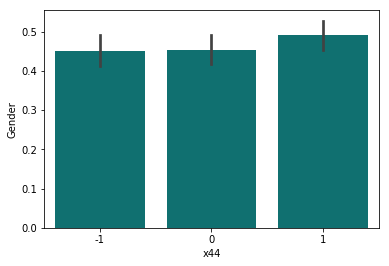

In [20]:
sns.barplot('x44', 'Gender', data=df, color="teal") #var 44 doesn't capture gender


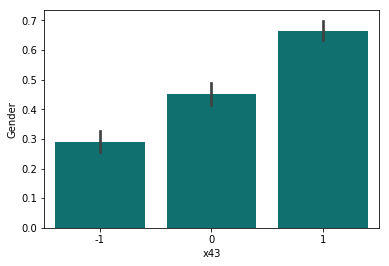

In [21]:
sns.barplot('x43', 'Gender', data=df, color="teal") #var 43 varies depending on gender -will consider variable below


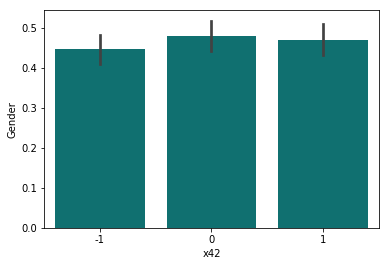

In [22]:
sns.barplot('x42', 'Gender', data=df, color="teal") #the same as x44

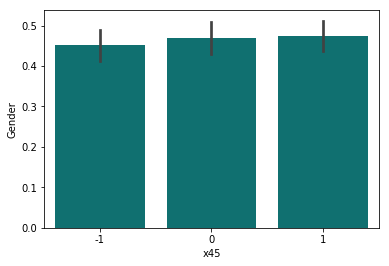

In [22]:
sns.barplot('x45', 'Gender', data=df, color="teal")  #the same as x44

# Lasso Regression

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

X=df.copy()

#drop dependent variable and categorical ones as described above
X.drop(['Gender'], axis=1, inplace=True)
X.drop(['x41'], axis=1, inplace=True)
X.drop(['x42'], axis=1, inplace=True)
X.drop(['x44'], axis=1, inplace=True)
X.drop(['x45'], axis=1, inplace=True)
X=pd.get_dummies(X, columns=['x43'])
X.drop(['x43_-1'], axis=1, inplace=True)
y = df['Gender']
#copy X for recursive feature elimination
X_rfe=X.copy()

#split on subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#check if everything is fine
X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x33,x34,x35,x36,x37,x38,x39,x40,x43_0,x43_1
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.034083,5.018200,4.911232,4.912412,4.956377,5.024579,4.935966,5.067840,5.086828,5.010133,...,4.988960,4.988325,4.985159,4.984694,4.908684,4.868374,4.995217,5.165625,0.337000,0.323500
std,2.909781,2.889966,2.871402,2.925843,2.897600,2.913924,2.921489,2.833147,2.850428,2.911342,...,2.850379,2.853574,2.906113,2.931335,2.848105,2.852245,2.911902,2.803282,0.472803,0.467929
min,0.001557,0.006796,0.004259,0.006314,0.009633,0.002398,0.003581,0.002622,0.008044,0.001992,...,0.000834,0.009028,0.005836,0.002803,0.000178,0.006052,0.000361,0.002939,0.000000,0.000000
25%,2.460645,2.535577,2.503660,2.323453,2.471000,2.495113,2.334584,2.576546,2.600456,2.559807,...,2.634839,2.468765,2.533647,2.426546,2.494812,2.383270,2.489068,2.798774,0.000000,0.000000
50%,5.059938,5.024768,4.805803,4.806753,4.924308,5.020893,4.964938,5.193205,5.201639,4.975510,...,4.925258,4.936059,4.978506,5.042467,4.883605,4.776674,5.024223,5.159642,0.000000,0.000000
75%,7.560343,7.571328,7.398937,7.513002,7.496324,7.484141,7.527601,7.497030,7.510152,7.602192,...,7.368070,7.360427,7.509905,7.540748,7.327315,7.278360,7.612702,7.596508,1.000000,1.000000
max,9.997439,9.998735,9.998568,9.991082,9.990208,9.997379,9.999543,9.997743,9.996769,9.993926,...,9.998607,9.999401,9.993760,9.999721,9.998322,9.987979,9.997630,9.987218,1.000000,1.000000


In [26]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

print(lassocv.alpha_)

lasso = Lasso(max_iter = 10000, normalize = True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

lasso.fit(X, y)
print(pd.Series(lasso.coef_, index = X.columns))
lasso.intercept_

0.000337764364541264
x1       0.000000
x2      -0.000000
x3       0.035548
x4      -0.000000
x5       0.000000
x6       0.000000
x7       0.000000
x8      -0.000000
x9       0.001220
x10     -0.000000
x11     -0.000000
x12     -0.027718
x13      0.000000
x14      0.000733
x15     -0.000000
x16      0.000000
x17      0.000000
x18      0.002563
x19     -0.000000
x20     -0.000000
x21     -0.030908
x22      0.000000
x23      0.000000
x24     -0.000000
x25     -0.000000
x26      0.000000
x27     -0.000000
x28      0.000000
x29     -0.000000
x30     -0.000000
x31      0.000000
x32      0.000000
x33     -0.000000
x34      0.000000
x35     -0.000000
x36      0.000000
x37     -0.000000
x38      0.000281
x39     -0.000000
x40     -0.000000
x43_0    0.105591
x43_1    0.309550
dtype: float64


0.4280880412075506

# Logit with Lasso variables

In [27]:
#non-zero variables
Selected_features = ['x43_0','x43_1','x38','x21','x18','x14','x12','x9','x3']

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression


# select only important variables
X_l = X[Selected_features]

#split on train/test
X_train, X_test, y_train, y_test = train_test_split(X_l, y, test_size=0.3, random_state=2)

# build logit
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
colum_label = list(X_train.columns)
model_Coeff = pd.DataFrame(logreg.coef_, columns = colum_label)
model_Coeff['intercept'] = logreg.intercept_

# results
print('Test split results:')

print("Coefficient Values Of The Surface Are: \n\n", model_Coeff)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" precision is %2.3f" % precision_score(y_test, y_pred))
print(logreg.__class__.__name__+" recall is %2.3f" % recall_score(y_test, y_pred))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Test split results:
Coefficient Values Of The Surface Are: 

       x43_0     x43_1       x38       x21       x18       x14       x12  \
0  0.767395  1.958576  0.028076 -0.189053  0.031119  0.022651 -0.186383   

         x9        x3  intercept  
0  0.028044  0.234555  -0.882763  
LogisticRegression accuracy is 0.667
LogisticRegression precision is 0.667
LogisticRegression recall is 0.587
LogisticRegression auc is 0.745


# Logit with Lasso (standartized)

In [31]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#the same variables from Lasso
Selected_features = ['x43_0','x43_1','x38','x21','x18','x14','x12','x9','x3']

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

X_ls = X[Selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_ls, y, test_size=0.3, random_state=2)

from sklearn import preprocessing
#standartization
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

#build logit
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
y_pred = logreg.predict(X_test_std)
y_pred_proba = logreg.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
colum_label = list(X_train.columns)
model_Coeff = pd.DataFrame(logreg.coef_, columns = colum_label)
model_Coeff['intercept'] = logreg.intercept_

#results
print('Test split results:')

print("Coefficient Values Of The Surface Are: \n\n", model_Coeff)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" precision is %2.3f" % precision_score(y_test, y_pred))
print(logreg.__class__.__name__+" recall is %2.3f" % recall_score(y_test, y_pred))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Test split results:
Coefficient Values Of The Surface Are: 

       x43_0     x43_1       x38       x21       x18       x14       x12  \
0  0.379723  0.950424  0.087366 -0.531168  0.098802  0.071424 -0.527397   

         x9        x3  intercept  
0  0.087944  0.689762  -0.186923  
LogisticRegression accuracy is 0.670
LogisticRegression precision is 0.672
LogisticRegression recall is 0.587
LogisticRegression auc is 0.745


# Logit with Lasso (ln variables)

In [33]:
pd.options.mode.chained_assignment = None  

Selected_features = ['x43_0','x43_1','x38','x21','x18','x14','x12','x9','x3']

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

# create variables with ln
X_ln = X[Selected_features]
X_ln['x38']=np.log(X['x38']+0.000000001)
X_ln['x21']=np.log(X['x21']+0.000000001)
X_ln['x18']=np.log(X['x18']+0.000000001)
X_ln['x14']=np.log(X['x14']+0.000000001)
X_ln['x12']=np.log(X['x12']+0.000000001)
X_ln['x9']=np.log(X['x9']+0.000000001)
X_ln['x3']=np.log(X['x3']+0.000000001)

X_train, X_test, y_train, y_test = train_test_split(X_ln, y, test_size=0.3, random_state=2)

# build logit
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

colum_label = list(X_train.columns)
model_Coeff = pd.DataFrame(logreg.coef_, columns = colum_label)
model_Coeff['intercept'] = logreg.intercept_

#results
print('Test split results:')

print("Coefficient Values Of The Surface Are: \n\n", model_Coeff)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" precision is %2.3f" % precision_score(y_test, y_pred))
print(logreg.__class__.__name__+" recall is %2.3f" % recall_score(y_test, y_pred))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Test split results:
Coefficient Values Of The Surface Are: 

       x43_0     x43_1       x38       x21       x18      x14       x12  \
0  0.722856  1.850217  0.100884 -0.477309  0.104674  0.09266 -0.474005   

         x9        x3  intercept  
0  0.010732  0.515969  -0.805549  
LogisticRegression accuracy is 0.653
LogisticRegression precision is 0.647
LogisticRegression recall is 0.583
LogisticRegression auc is 0.724


# Recursive Feature Elimination (7-12 variables)+ Logit

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


X_r = X_rfe
y_r = y

sel=[]

#select list of list important variables - from 7 to 12
for i in range (7,12):
    model = LogisticRegression()
    rfe = RFE(model,i)
    rfe = rfe.fit(X_r, y_r)
    print(list(X.columns[rfe.support_]))
    sel.append (list(X.columns[rfe.support_]))

['x3', 'x9', 'x12', 'x18', 'x21', 'x43_0', 'x43_1']
['x3', 'x9', 'x12', 'x14', 'x18', 'x21', 'x43_0', 'x43_1']
['x3', 'x9', 'x12', 'x14', 'x18', 'x21', 'x38', 'x43_0', 'x43_1']
['x3', 'x9', 'x12', 'x14', 'x18', 'x20', 'x21', 'x38', 'x43_0', 'x43_1']
['x3', 'x9', 'x11', 'x12', 'x14', 'x18', 'x20', 'x21', 'x38', 'x43_0', 'x43_1']


In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

#build logits with all selected sets of variables
for l in sel:
    Selected_features = l

    X_rl = X_r[Selected_features]
    y = y


    X_train, X_test, y_train, y_test = train_test_split(X_rl, y, test_size=0.3, random_state=2)


    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_proba = logreg.predict_proba(X_test)[:, 1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    
    colum_label = list(X_train.columns)
    model_Coeff = pd.DataFrame(logreg.coef_, columns = colum_label)
    model_Coeff['intercept'] = logreg.intercept_

    print('Test split results:')
    print (l)
    print("Coefficient Values Of The Surface Are: \n\n", model_Coeff)
    print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
    print(logreg.__class__.__name__+" precision is %2.3f" % precision_score(y_test, y_pred))
    print(logreg.__class__.__name__+" recall is %2.3f" % recall_score(y_test, y_pred))
    print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
    print ("---------------------------------------------")

Test split results:
['x3', 'x9', 'x12', 'x18', 'x21', 'x43_0', 'x43_1']
Coefficient Values Of The Surface Are: 

          x3        x9       x12     x18      x21     x43_0     x43_1  \
0  0.234198  0.028311 -0.186698  0.0313 -0.18891  0.767553  1.962431   

   intercept  
0  -0.631173  
LogisticRegression accuracy is 0.665
LogisticRegression precision is 0.667
LogisticRegression recall is 0.580
LogisticRegression auc is 0.742
---------------------------------------------
Test split results:
['x3', 'x9', 'x12', 'x14', 'x18', 'x21', 'x43_0', 'x43_1']
Coefficient Values Of The Surface Are: 

          x3        x9       x12       x14       x18      x21     x43_0  \
0  0.234489  0.027989 -0.185994  0.022246  0.030682 -0.19022  0.762308   

      x43_1  intercept  
0  1.961384  -0.735864  
LogisticRegression accuracy is 0.660
LogisticRegression precision is 0.657
LogisticRegression recall is 0.583
LogisticRegression auc is 0.744
---------------------------------------------
Test split resu

# Random Forest+Lasso

In [38]:
from sklearn.ensemble import RandomForestClassifier

Selected_features = ['x43_0','x43_1','x38','x21','x18','x14','x12','x9','x3']
X_f=X[Selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.3, random_state=2)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)


from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6316666666666667


# Naive Bayes+PCA

In [39]:

from sklearn import preprocessing

Selected_features = ['x43_0','x43_1','x38','x21','x18','x14','x12','x9','x3']
X_n=X[Selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.3, random_state=2)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)


from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)

In [41]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print(metrics.accuracy_score(y_train, pred_train))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print(metrics.accuracy_score(y_test, pred_test))


Prediction accuracy for the training dataset
0.5635714285714286

Prediction accuracy for the test dataset
0.5266666666666666


In [42]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print(metrics.accuracy_score(y_train, pred_train_std))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print(metrics.accuracy_score(y_test, pred_test_std))


Prediction accuracy for the training dataset
0.6542857142857142

Prediction accuracy for the test dataset
0.6
